In [2]:
import pandas as pd
try:
  import pickle5 as pickle
except:
  !pip install pickle5
  import pickle5 as pickle
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, GlobalMaxPooling1D, Flatten
from keras.layers import Conv1D, MaxPooling1D, Embedding,  Concatenate, Lambda
from keras.models import Model
from sklearn.metrics import roc_auc_score,roc_curve, auc
from numpy import random
from keras.layers import LSTM, Bidirectional, GlobalMaxPool1D, Dropout
from keras.optimizers import Adam
from keras.utils.vis_utils import plot_model
import seaborn as sns

import sys
sys.path.insert(0,'/content/drive/MyDrive/ML_Data/')
import functions as f

In [4]:
def load_data(D=1,randomize=False):
    try:
        with open('/content/drive/MyDrive/ML_Data/df_train_'+str(D)+'D.pickle', 'rb') as handle:
            df_train = pickle.load(handle)
    except:
        df_train = pd.read_pickle("C:/Users/nik00/py/proj/hyppi-train.pkl")
    try:
        with open('/content/drive/MyDrive/ML_Data/df_test_'+str(D)+'D.pickle', 'rb') as handle:
            df_test = pickle.load(handle)
    except:
        df_test = pd.read_pickle("C:/Users/nik00/py/proj/hyppi-independent.pkl")
    if randomize:
        return shuff_together(df_train,df_test)
    else:
        return df_train,df_test

df_train,df_test = load_data(2)
print('The data used will be:')
df_train[['Joined']]

The data used will be:


,Joined
0,"[MK, KD, DK, KQ, QK, KK, KK, KK, KE, ER, RT, T..."
1,"[MS, SW, WS, SG, GL, LL, LH, HG, GL, LN, NT, T..."
2,"[MS, SL, LF, FD, DL, LF, FR, RG, GF, FF, FG, G..."
3,"[MA, AV, VA, AP, PR, RL, LF, FG, GG, GL, LC, C..."
4,"[MS, ST, TI, IQ, QS, SE, ET, TD, DC, CY, YD, D..."
...,...
6265,"[MS, SY, YF, FG, GE, EH, HF, FW, WG, GE, EK, K..."
6266,"[MT, TV, VG, GK, KS, SS, SK, KM, ML, LQ, QH, H..."
6267,"[MN, NN, NL, LS, SF, FS, SE, EL, LC, CC, CL, L..."
6268,"[MA, AP, PE, EI, IN, NL, LP, PG, GP, PM, MS, S..."


Median length of Joined sequence is 879


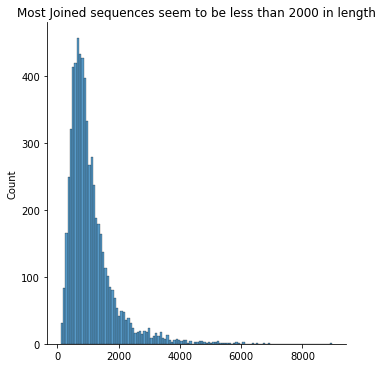

In [ ]:
lengths = sorted(len(s) for s in df_train['Joined'])
print("Median length of Joined sequence is",lengths[len(lengths)//2])
_  = sns.displot(lengths)
_=plt.title("Most Joined sequences seem to be less than 2000 in length")

MAX_VOCAB_SIZE is 1000
MAX_SEQUENCE_LENGTH is 2000
max sequence_data length: 8964
min sequence_data length: 105
median sequence_data length: 879


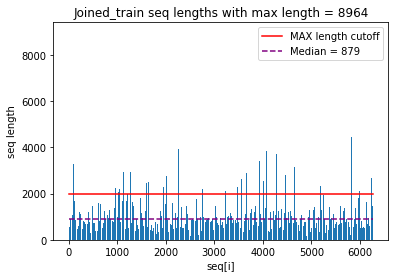

max word index: 400
Found 400 unique tokens.
pre padding.
Shape of data tensor: (6270, 2000)
max sequences_test length: 6124
min sequences_test length: 132
median sequences_test length: 899


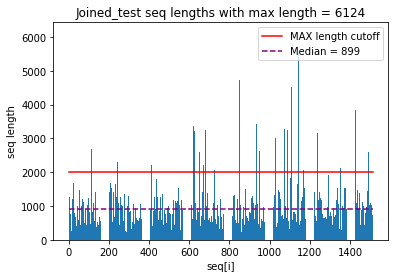

pre padding for test seq.
Shape of data_test tensor: (1514, 2000)
num_words is 401


In [5]:
data_2D_join,data_test_2D_join,num_words_2D,MAX_SEQUENCE_LENGTH_2D,MAX_VOCAB_SIZE_2D = f.get_seq_data_join(1000,2000,df_train,df_test,pad='pre',show=True)

In [6]:
EMBEDDING_DIM_2D = 5
VALIDATION_SPLIT = 0.2
BATCH_SIZE = 128
EPOCHS = 20
M_2D=15

embedding_matrix_2D = random.uniform(-1, 1,(num_words_2D,EMBEDDING_DIM_2D))
embedding_layer_2D_join = Embedding(
  num_words_2D,
  EMBEDDING_DIM_2D,
  weights=[embedding_matrix_2D],
  input_length=MAX_SEQUENCE_LENGTH_2D,
  trainable=True
)
MAX_SEQUENCE_LENGTH_2D 

2000

In [8]:


ip = Input(shape=(MAX_SEQUENCE_LENGTH_2D,),name = 'model2D_join_ip')
x = embedding_layer_2D_join(ip)
x = Bidirectional(LSTM(M_2D, return_sequences=True),name = 'model2D_join_Bidirectional')(x)
x = Dropout(0.2)(x)
x = Dense(128, activation='relu')(x)
x = GlobalMaxPool1D()(x)


output = Dense(1, activation="sigmoid")(x)

model2D_join = Model(ip, output)



model2D_join.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)


jk = model2D_join.fit(
  data_2D_join,
  df_train['label'].values,
  batch_size=BATCH_SIZE,
  epochs=EPOCHS,
  #validation_split=VALIDATION_SPLIT
)

Epoch 1/20
49/49 [==============================] - 25s 136ms/step - loss: 0.6888 - accuracy: 0.5447
Epoch 2/20
49/49 [==============================] - 7s 135ms/step - loss: 0.6345 - accuracy: 0.6324
Epoch 3/20
49/49 [==============================] - 7s 135ms/step - loss: 0.5954 - accuracy: 0.6751
Epoch 4/20
49/49 [==============================] - 7s 136ms/step - loss: 0.5820 - accuracy: 0.6754
Epoch 5/20
49/49 [==============================] - 7s 136ms/step - loss: 0.5213 - accuracy: 0.7359
Epoch 6/20
49/49 [==============================] - 7s 137ms/step - loss: 0.5006 - accuracy: 0.7583
Epoch 7/20
49/49 [==============================] - 7s 137ms/step - loss: 0.4799 - accuracy: 0.7661
Epoch 8/20
49/49 [==============================] - 7s 138ms/step - loss: 0.4791 - accuracy: 0.7696
Epoch 9/20
49/49 [==============================] - 7s 138ms/step - loss: 0.4356 - accuracy: 0.7975
Epoch 10/20
49/49 [==============================] - 7s 137ms/step - loss: 0.4119 - accuracy: 0.814

In [9]:
yhat =  model2D_join.predict(data_test_2D_join)
y = df_test['label'].values
from sklearn import metrics
fpr, tpr, thresholds = roc_curve(y, yhat)
auc = metrics.auc(fpr, tpr)
auc

0.7840245773049076